# Notes
Try 10, or 100, or 1000 PPP

Try using a denoiser to fill in missing pixels for each one then colorizing it using:

https://github.com/satoshiiizuka/siggraph2016_colorization?tab=readme-ov-file

or

https://github.com/richzhang/colorization

# Setup

In [27]:
from urllib.request import urlretrieve
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
imgname = ["kodim01.png", "kodim02.png", "kodim05.png", "kodim08.png",
           "kodim14.png", "kodim15.png", "kodim22.png", "kodim23.png"]


In [28]:
for i in imgname:
  url = "http://r0k.us/graphics/kodak/kodak/" + i
  urlretrieve(url, i)
  print ('image number', i, 'downloaded.')

image number kodim01.png downloaded.
image number kodim02.png downloaded.
image number kodim05.png downloaded.
image number kodim08.png downloaded.
image number kodim14.png downloaded.
image number kodim15.png downloaded.
image number kodim22.png downloaded.
image number kodim23.png downloaded.


In [29]:
im01 = cv2.imread('kodim01.png',-1)  #the -1 reads the image data unchanged
im02 = cv2.imread('kodim02.png',-1)
im05 = cv2.imread('kodim05.png',-1)
im08 = cv2.imread('kodim08.png',-1)
im14 = cv2.imread('kodim14.png',-1)
im15 = cv2.imread('kodim15.png',-1)
im22 = cv2.imread('kodim22.png',-1)
im23 = cv2.imread('kodim23.png',-1)

#img = img[:, :, ::-1] # reversing the seq of BGR to RGB
im01 = cv2.cvtColor(im01, cv2.COLOR_BGR2GRAY)
im02 = cv2.cvtColor(im02, cv2.COLOR_BGR2GRAY)
im05 = cv2.cvtColor(im05, cv2.COLOR_BGR2GRAY)
im08 = cv2.cvtColor(im08, cv2.COLOR_BGR2GRAY)
im14 = cv2.cvtColor(im14, cv2.COLOR_BGR2GRAY)
im15 = cv2.cvtColor(im15, cv2.COLOR_BGR2GRAY)
im22 = cv2.cvtColor(im22, cv2.COLOR_BGR2GRAY)
im23 = cv2.cvtColor(im23, cv2.COLOR_BGR2GRAY)
cv2.imwrite('./gray/kd01gray.png', im01)
cv2.imwrite('./gray/kd02gray.png', im02)
cv2.imwrite('./gray/kd05gray.png', im05)
cv2.imwrite('./gray/kd08gray.png', im08)
cv2.imwrite('./gray/kd14gray.png', im14)
cv2.imwrite('./gray/kd15gray.png', im15)
cv2.imwrite('./gray/kd22gray.png', im22)
cv2.imwrite('./gray/kd23gray.png', im23)


True

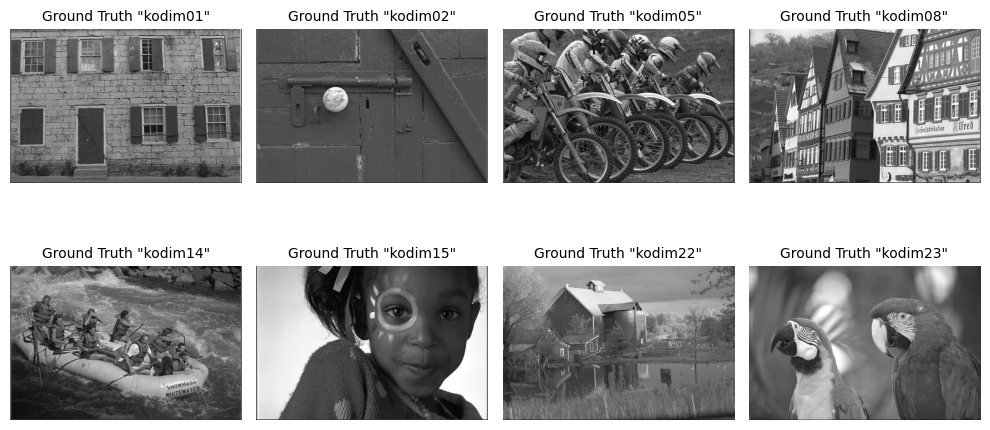

In [30]:
plt.figure(figsize=[10,10])

plt.subplot(241)
plt.axis('off')
plt.title('Ground Truth "kodim01"', fontsize=10)
plt.imshow(im01, cmap='gray')

plt.subplot(242)
plt.axis('off')
plt.title('Ground Truth "kodim02"', fontsize=10)
plt.imshow(im02, cmap='gray')

plt.subplot(243)
plt.axis('off')
plt.title('Ground Truth "kodim05"', fontsize=10)
plt.imshow(im05, cmap='gray')

plt.subplot(244)
plt.axis('off')
plt.title('Ground Truth "kodim08"', fontsize=10)
plt.imshow(im08, cmap='gray')

plt.subplot(245)
plt.axis('off')
plt.title('Ground Truth "kodim14"', fontsize=10)
plt.imshow(im14, cmap='gray')

plt.subplot(246)
plt.axis('off')
plt.title('Ground Truth "kodim15"', fontsize=10)
plt.imshow(im15, cmap='gray')

plt.subplot(247)
plt.axis('off')
plt.title('Ground Truth "kodim22"', fontsize=10)
plt.imshow(im22, cmap='gray')

plt.subplot(248)
plt.axis('off')
plt.title('Ground Truth "kodim23"', fontsize=10)
plt.imshow(im23, cmap='gray')

plt.tight_layout()
plt.tight_layout()
plt.tight_layout()

In [31]:
im01 = im01.astype('float')/255.0
im02 = im02.astype('float')/255.0
im05 = im05.astype('float')/255.0
im08 = im08.astype('float')/255.0
im14 = im14.astype('float')/255.0
im15 = im15.astype('float')/255.0
im22 = im22.astype('float')/255.0
im23 = im23.astype('float')/255.0

# PPP Experiments

In [32]:
ten_ppp = 10   # photons per pixel (averaged over the whole image)
hundred_ppp = 100
thousand_ppp = 1000

In [33]:
im01_10 = im01 / im01.mean() * ten_ppp
im02_10 = im02 / im02.mean() * ten_ppp
im05_10 = im05 / im05.mean() * ten_ppp
im08_10 = im08 / im08.mean() * ten_ppp
im14_10 = im14 / im14.mean() * ten_ppp
im15_10 = im15 / im15.mean() * ten_ppp
im22_10 = im22 / im22.mean() * ten_ppp
im23_10 = im23 / im23.mean() * ten_ppp

In [34]:
im01_100 = im01 / im01.mean() * hundred_ppp
im02_100 = im02 / im02.mean() * hundred_ppp
im05_100 = im05 / im05.mean() * hundred_ppp
im08_100 = im08 / im08.mean() * hundred_ppp
im14_100 = im14 / im14.mean() * hundred_ppp
im15_100 = im15 / im15.mean() * hundred_ppp
im22_100 = im22 / im22.mean() * hundred_ppp
im23_100 = im23 / im23.mean() * hundred_ppp


In [35]:
im01_1000 = im01 / im01.mean() * thousand_ppp
im02_1000 = im02 / im02.mean() * thousand_ppp
im05_1000 = im05 / im05.mean() * thousand_ppp
im08_1000 = im08 / im08.mean() * thousand_ppp
im14_1000 = im14 / im14.mean() * thousand_ppp
im15_1000 = im15 / im15.mean() * thousand_ppp
im22_1000 = im22 / im22.mean() * thousand_ppp
im23_1000 = im23 / im23.mean() * thousand_ppp


In [36]:
# THIS IS WHERE I CALL THE POISSON RANDOM NUMBER GENERATOR
pois_im01_10 = np.random.poisson(im01_10).astype('float')
pois_im02_10 = np.random.poisson(im02_10).astype('float')
pois_im05_10 = np.random.poisson(im05_10).astype('float')
pois_im08_10 = np.random.poisson(im08_10).astype('float')
pois_im14_10 = np.random.poisson(im14_10).astype('float')
pois_im15_10 = np.random.poisson(im15_10).astype('float')
pois_im22_10 = np.random.poisson(im22_10).astype('float')
pois_im23_10 = np.random.poisson(im23_10).astype('float')

In [37]:
pois_im01_100 = np.random.poisson(im01_100).astype('float')
pois_im02_100 = np.random.poisson(im02_100).astype('float')
pois_im05_100 = np.random.poisson(im05_100).astype('float')
pois_im08_100 = np.random.poisson(im08_100).astype('float')
pois_im14_100 = np.random.poisson(im14_100).astype('float')
pois_im15_100 = np.random.poisson(im15_100).astype('float')
pois_im22_100 = np.random.poisson(im22_100).astype('float')
pois_im23_100 = np.random.poisson(im23_100).astype('float')

In [38]:
pois_im01_1000 = np.random.poisson(im01_1000).astype('float')
pois_im02_1000 = np.random.poisson(im02_1000).astype('float')
pois_im05_1000 = np.random.poisson(im05_1000).astype('float')
pois_im08_1000 = np.random.poisson(im08_1000).astype('float')
pois_im14_1000 = np.random.poisson(im14_1000).astype('float')
pois_im15_1000 = np.random.poisson(im15_1000).astype('float')
pois_im22_1000 = np.random.poisson(im22_1000).astype('float')
pois_im23_1000 = np.random.poisson(im23_1000).astype('float')

In [39]:
# plt.figure(figsize=[10,10])

# plt.subplot(241)
# plt.axis('off')
# plt.title('10 PPP "kodim01"', fontsize=10)
# plt.imshow(pois_im01_10, cmap='gray')

# plt.subplot(242)
# plt.axis('off')
# plt.title('10 PPP "kodim02"', fontsize=10)
# plt.imshow(pois_im02_10, cmap='gray')

# plt.subplot(243)
# plt.axis('off')
# plt.title('10 PPP "kodim05"', fontsize=10)
# plt.imshow(pois_im05_10, cmap='gray')

# plt.subplot(244)
# plt.axis('off')
# plt.title('10 PPP "kodim08"', fontsize=10)
# plt.imshow(pois_im08_10, cmap='gray')

# plt.subplot(245)
# plt.axis('off')
# plt.title('10 PPP "kodim14"', fontsize=10)
# plt.imshow(pois_im14_10, cmap='gray')

# plt.subplot(246)
# plt.axis('off')
# plt.title('10 PPP "kodim15"', fontsize=10)
# plt.imshow(pois_im15_10, cmap='gray')

# plt.subplot(247)
# plt.axis('off')
# plt.title('10 PPP "kodim22"', fontsize=10)
# plt.imshow(pois_im22_10, cmap='gray')

# plt.subplot(248)
# plt.axis('off')
# plt.title('10 PPP "kodim23"', fontsize=10)
# plt.imshow(pois_im23_10, cmap='gray')

# plt.tight_layout()
# plt.tight_layout()
# plt.tight_layout()

In [40]:
# pois_im01_10[pois_im01_10>0] = 1
# pois_im02_10[pois_im02_10>0] = 1
# pois_im05_10[pois_im05_10>0] = 1
# pois_im08_10[pois_im08_10>0] = 1
# pois_im14_10[pois_im14_10>0] = 1
# pois_im15_10[pois_im15_10>0] = 1
# pois_im22_10[pois_im22_10>0] = 1
# pois_im23_10[pois_im23_10>0] = 1

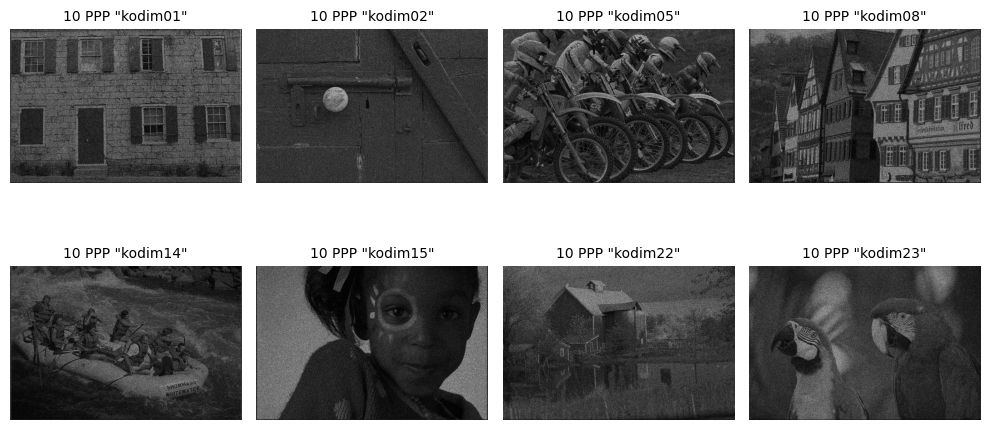

In [41]:
plt.figure(figsize=[10,10])

plt.subplot(241)
plt.axis('off')
plt.title('10 PPP "kodim01"', fontsize=10)
plt.imshow(pois_im01_10, cmap='gray')

plt.subplot(242)
plt.axis('off')
plt.title('10 PPP "kodim02"', fontsize=10)
plt.imshow(pois_im02_10, cmap='gray')

plt.subplot(243)
plt.axis('off')
plt.title('10 PPP "kodim05"', fontsize=10)
plt.imshow(pois_im05_10, cmap='gray')

plt.subplot(244)
plt.axis('off')
plt.title('10 PPP "kodim08"', fontsize=10)
plt.imshow(pois_im08_10, cmap='gray')

plt.subplot(245)
plt.axis('off')
plt.title('10 PPP "kodim14"', fontsize=10)
plt.imshow(pois_im14_10, cmap='gray')

plt.subplot(246)
plt.axis('off')
plt.title('10 PPP "kodim15"', fontsize=10)
plt.imshow(pois_im15_10, cmap='gray')

plt.subplot(247)
plt.axis('off')
plt.title('10 PPP "kodim22"', fontsize=10)
plt.imshow(pois_im22_10, cmap='gray')

plt.subplot(248)
plt.axis('off')
plt.title('10 PPP "kodim23"', fontsize=10)
plt.imshow(pois_im23_10, cmap='gray')

plt.tight_layout()
plt.tight_layout()
plt.tight_layout()

In [42]:
cv2.imwrite('./10ppp/kd01_10ppp.png', pois_im01_10)
cv2.imwrite('./10ppp/kd02_10ppp.png', pois_im02_10)
cv2.imwrite('./10ppp/kd05_10ppp.png', pois_im05_10)
cv2.imwrite('./10ppp/kd08_10ppp.png', pois_im08_10)
cv2.imwrite('./10ppp/kd14_10ppp.png', pois_im14_10)
cv2.imwrite('./10ppp/kd15_10ppp.png', pois_im15_10)
cv2.imwrite('./10ppp/kd22_10ppp.png', pois_im22_10)
cv2.imwrite('./10ppp/kd23_10ppp.png', pois_im23_10)

True

In [43]:
# pois_im01_100[pois_im01_100>0] = 1
# pois_im02_100[pois_im02_100>0] = 1
# pois_im05_100[pois_im05_100>0] = 1
# pois_im08_100[pois_im08_100>0] = 1
# pois_im14_100[pois_im14_100>0] = 1
# pois_im15_100[pois_im15_100>0] = 1
# pois_im22_100[pois_im22_100>0] = 1
# pois_im23_100[pois_im23_100>0] = 1

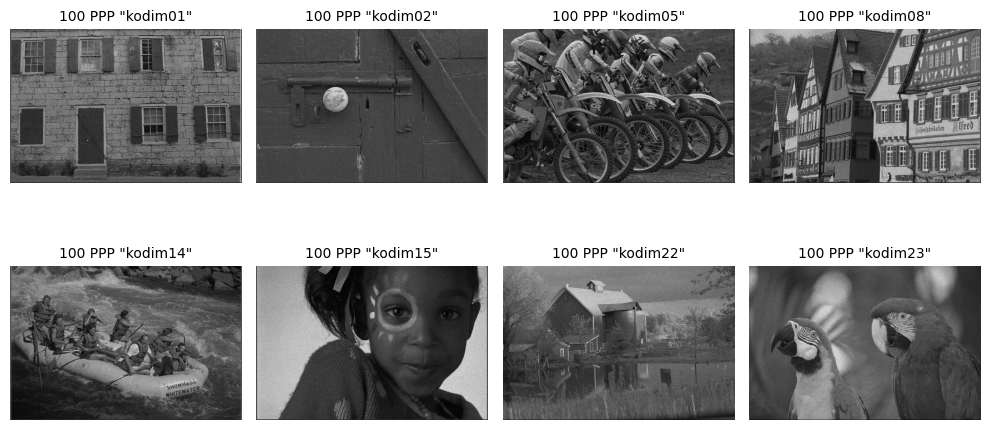

In [44]:
plt.figure(figsize=[10,10])

plt.subplot(241)
plt.axis('off')
plt.title('100 PPP "kodim01"', fontsize=10)
plt.imshow(pois_im01_100, cmap='gray')

plt.subplot(242)
plt.axis('off')
plt.title('100 PPP "kodim02"', fontsize=10)
plt.imshow(pois_im02_100, cmap='gray')

plt.subplot(243)
plt.axis('off')
plt.title('100 PPP "kodim05"', fontsize=10)
plt.imshow(pois_im05_100, cmap='gray')

plt.subplot(244)
plt.axis('off')
plt.title('100 PPP "kodim08"', fontsize=10)
plt.imshow(pois_im08_100, cmap='gray')

plt.subplot(245)
plt.axis('off')
plt.title('100 PPP "kodim14"', fontsize=10)
plt.imshow(pois_im14_100, cmap='gray')

plt.subplot(246)
plt.axis('off')
plt.title('100 PPP "kodim15"', fontsize=10)
plt.imshow(pois_im15_100, cmap='gray')

plt.subplot(247)
plt.axis('off')
plt.title('100 PPP "kodim22"', fontsize=10)
plt.imshow(pois_im22_100, cmap='gray')

plt.subplot(248)
plt.axis('off')
plt.title('100 PPP "kodim23"', fontsize=10)
plt.imshow(pois_im23_100, cmap='gray')

plt.tight_layout()
plt.tight_layout()
plt.tight_layout()

In [45]:
cv2.imwrite('./100ppp/kd01_100ppp.png', pois_im01_100)
cv2.imwrite('./100ppp/kd02_100ppp.png', pois_im02_100)
cv2.imwrite('./100ppp/kd05_100ppp.png', pois_im05_100)
cv2.imwrite('./100ppp/kd08_100ppp.png', pois_im08_100)
cv2.imwrite('./100ppp/kd14_100ppp.png', pois_im14_100)
cv2.imwrite('./100ppp/kd15_100ppp.png', pois_im15_100)
cv2.imwrite('./100ppp/kd22_100ppp.png', pois_im22_100)
cv2.imwrite('./100ppp/kd23_100ppp.png', pois_im23_100)

True

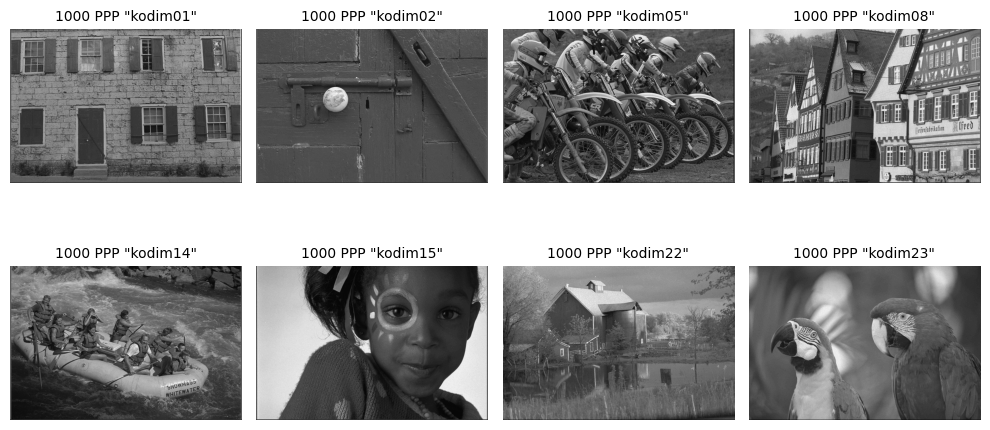

In [46]:
plt.figure(figsize=[10,10])

plt.subplot(241)
plt.axis('off')
plt.title('1000 PPP "kodim01"', fontsize=10)
plt.imshow(pois_im01_1000, cmap='gray')

plt.subplot(242)
plt.axis('off')
plt.title('1000 PPP "kodim02"', fontsize=10)
plt.imshow(pois_im02_1000, cmap='gray')

plt.subplot(243)
plt.axis('off')
plt.title('1000 PPP "kodim05"', fontsize=10)
plt.imshow(pois_im05_1000, cmap='gray')

plt.subplot(244)
plt.axis('off')
plt.title('1000 PPP "kodim08"', fontsize=10)
plt.imshow(pois_im08_1000, cmap='gray')

plt.subplot(245)
plt.axis('off')
plt.title('1000 PPP "kodim14"', fontsize=10)
plt.imshow(pois_im14_1000, cmap='gray')

plt.subplot(246)
plt.axis('off')
plt.title('1000 PPP "kodim15"', fontsize=10)
plt.imshow(pois_im15_1000, cmap='gray')

plt.subplot(247)
plt.axis('off')
plt.title('1000 PPP "kodim22"', fontsize=10)
plt.imshow(pois_im22_1000, cmap='gray')

plt.subplot(248)
plt.axis('off')
plt.title('1000 PPP "kodim23"', fontsize=10)
plt.imshow(pois_im23_1000, cmap='gray')

plt.tight_layout()
plt.tight_layout()
plt.tight_layout()

In [52]:
pois_im01_1000 = (pois_im01_1000*255).astype(np.uint8)
cv2.imwrite('./1000ppp/kd01_1000ppp.png', pois_im01_1000)

True

In [21]:
cv2.imwrite('./1000ppp/kd01_1000ppp.png', pois_im01_1000)
cv2.imwrite('./1000ppp/kd02_1000ppp.png', pois_im02_1000)
cv2.imwrite('./1000ppp/kd05_1000ppp.png', pois_im05_1000)
cv2.imwrite('./1000ppp/kd08_1000ppp.png', pois_im08_1000)
cv2.imwrite('./1000ppp/kd14_1000ppp.png', pois_im14_1000)
cv2.imwrite('./1000ppp/kd15_1000ppp.png', pois_im15_1000)
cv2.imwrite('./1000ppp/kd22_1000ppp.png', pois_im22_1000)
cv2.imwrite('./1000ppp/kd23_1000ppp.png', pois_im23_1000)


True